# Chapter 9 - Support Vector Machines

In [50]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

pd.set_option('display.notebook_repr_html', True)
# When True, IPython notebook will use html representation for pandas objects (if it is available).

# make matplotlib graphics to show up inline.
%matplotlib inline 
#plt.style.use('seaborn-white') # Select one of pre-defined styles provided by matplotlib.

## LAB

### 9.6.1 Support Vector Classifier

### Define a function to plot a classifier with support vectors.

In [51]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

### Generating random data: 20 observations of 2 features and divide into two classes.

In [52]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

In [53]:
X

array([[ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-1.19276461, -0.20487651],
       [-0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751],
       [-0.98060789, -0.85685315],
       [-0.87187918, -0.42250793],
       [ 0.99643983,  0.71242127],
       [ 0.05914424, -0.36331088],
       [ 0.00328884, -0.10593044],
       [ 0.79305332, -0.63157163],
       [-0.00619491, -0.10106761],
       [-0.05230815,  0.24921766],
       [ 0.19766009,  1.33484857],
       [-0.08687561,  1.56153229]])

In [54]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

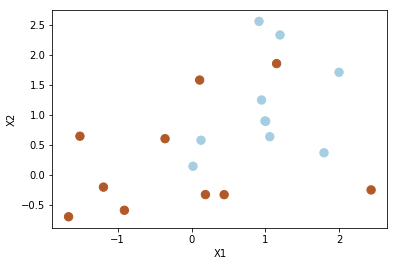

In [55]:
X[y == -1] = X[y == -1] +1  # when y is -1, add 1 to x1 and x2
                            # move "y == -1" class data to right and up by adding 1 from the original value
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired) # s: size; c: color; cmap: color map
# refer to: http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
# when y = 1, red color; when y = -1, blue color
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()  

The two classes are not linearly separable

In [56]:
tmp = np.random.randn(2,2)

In [57]:
tmp

array([[-0.30585302, -0.47773142],
       [ 0.10073819,  0.35543847]])

In [58]:
tmp = tmp + 1

In [59]:
print (tmp)

[[0.69414698 0.52226858]
 [1.10073819 1.35543847]]


SVC function uses a slightly different formulation from (9.14) and (9.25) for the
support vector classifier. A cost argument allows us to specify the cost of
a violation to the margin. When the cost argument is small, then the margins
will be wide and many support vectors will be on the margin or will
violate the margin. When the cost argument is large, then the margins will
be narrow and there will be few support vectors on the margin or violating
the margin.

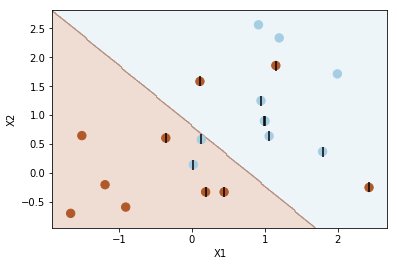

Number of support vectors:  13


In [60]:
# Support Vector Classifier with linear kernel
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)  # circles marked with vertical bar indicate support vectors.

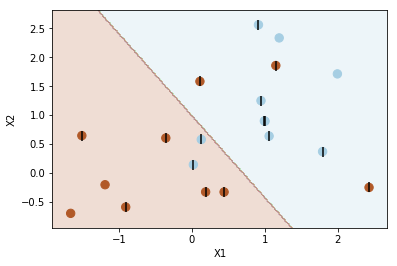

Number of support vectors:  16


In [61]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [62]:
# Select the optimal C parameter by cross-validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
# clf.grid_scores_
clf.cv_results_['mean_test_score'] # when  C == 0.001, result is 0.8

array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75])

In [63]:
# 0.001 is best according to GridSearchCV. 
clf.best_params_

{'C': 0.001}

### Generating test data

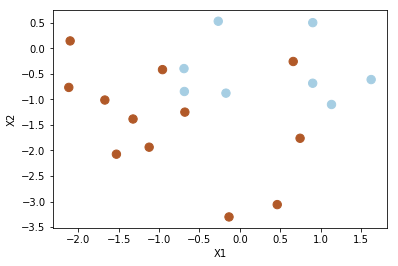

In [64]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1  # move class1 data to left and down by detucting 1 from the original value

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');
plt.show()  # when y = 1, red color; when y = -1, blue color

In [65]:
y_test

array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
        1,  1,  1])

In [66]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


In [67]:
svc3 = SVC(C=0.001, kernel='linear') # best c value from 10-CV
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)
# The misclassification is the same

,-1,1
-1,2,6
1,0,12


In [68]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm.T, index=svc3.classes_, columns=svc3.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       -1   1
Predicted        
-1          2   0
 1          6  12


### Changing the test data so that the classes are really separable with a hyperplane.

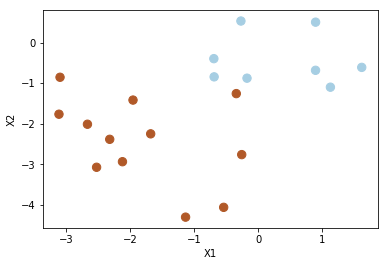

In [69]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

We fit the support
vector classifier and plot the resulting hyperplane, using a large value
of cost so that no observations are misclassified.

In [70]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)  # note that the model is learned with test data for dicision boundary demonstration

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

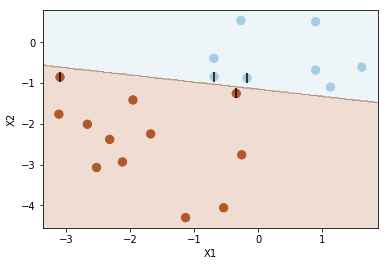

Number of support vectors:  4


In [71]:
plot_svc(svc4, X_test, y_test)

No training errors were made and only four support vectors were used.
However, we can see from the figure that the margin is very narrow (because
the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform
poorly on test data. We now try a smaller value of cost:

In [72]:
# Increase the margin. Now there is one misclassification: increased bias, lower variance.
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

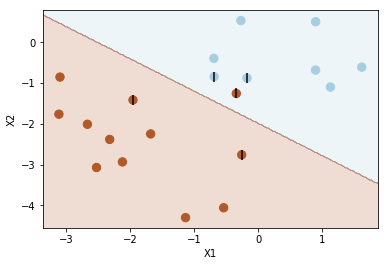

Number of support vectors:  5


In [73]:
plot_svc(svc5, X_test, y_test)

Using cost=1, we misclassify a training observation, but we also obtain
a much wider margin and make use of five support vectors. It seems
likely that this model will perform better on test data than the model with cost=10

### 9.6.2 Support Vector Machine 
Generating sample data with a non-linear class boundary

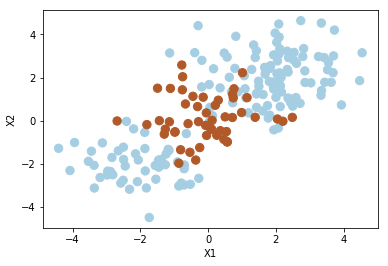

In [74]:
# Generating sample data with a non-linear class boundary
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2        # move -1 class data to right and up by adding 2 from the original value
X[101:150] = X[101:150] -2  # move -1 class data to left and down by detucting 2 from the original value
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()  # when y = 1, red color; when y = -1, blue color

In [75]:
X

array([[ 2.09120472,  3.09128273],
       [ 0.05302969,  0.61365047],
       [-0.29649157,  4.4098343 ],
       [ 3.72783617,  4.20455628],
       [ 2.79482764,  2.9764211 ],
       [ 0.81657285,  3.91636361],
       [ 0.8766732 ,  1.33596453],
       [ 1.62164143,  1.20838473],
       [ 2.85954811,  1.769211  ],
       [ 1.93433897,  1.79136377],
       [ 3.34686857,  1.3930472 ],
       [ 1.82575179,  2.42405142],
       [ 0.3540099 ,  1.51645905],
       [ 2.53546825,  3.16614049],
       [ 2.16168311,  1.32716607],
       [ 3.44252413,  1.77851939],
       [ 2.03126431,  2.18192959],
       [ 1.93707127,  1.45843154],
       [ 2.47451842,  0.83540883],
       [ 1.49909061,  1.59143904],
       [ 1.06565164,  2.08451015],
       [ 2.14369102,  2.07554944],
       [ 1.8443549 ,  2.55085006],
       [ 3.70202996,  3.0060937 ],
       [-1.13491977,  3.1395335 ],
       [ 0.13020064,  0.22088696],
       [ 2.1277629 ,  0.64898224],
       [ 3.5539672 ,  2.69696575],
       [ 1.18853885,

In [76]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [77]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

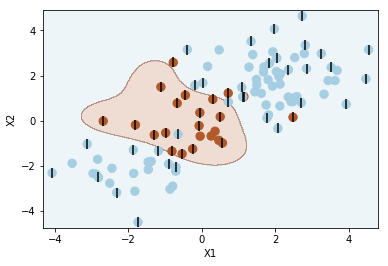

Number of support vectors:  51


In [78]:
plot_svc(svm, X_train, y_train)

We can see from the figure that there are a fair number of training errors
in this SVM fit. If we increase the value of cost, we can reduce the number
of training errors. However, this comes at the price of a more irregular
decision boundary that seems to be at risk of overfitting the data.

In [79]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

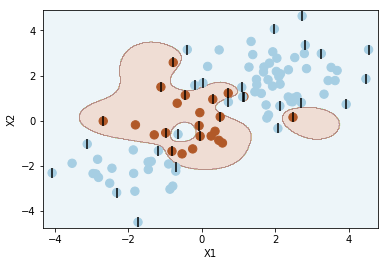

Number of support vectors:  36


In [80]:
plot_svc(svm2, X_train, y_train) # the number of training errors is reduced by overfitting the data

In [81]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
#clf.grid_scores_
#clf.cv_results_
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['params'])

[0.77 0.77 0.77 0.77 0.77 0.77 0.77 0.77 0.77 0.77 0.92 0.92 0.9  0.88
 0.85 0.92 0.89 0.86 0.86 0.87 0.84 0.83 0.86 0.87 0.87]
[{'C': 0.01, 'gamma': 0.5}, {'C': 0.01, 'gamma': 1}, {'C': 0.01, 'gamma': 2}, {'C': 0.01, 'gamma': 3}, {'C': 0.01, 'gamma': 4}, {'C': 0.1, 'gamma': 0.5}, {'C': 0.1, 'gamma': 1}, {'C': 0.1, 'gamma': 2}, {'C': 0.1, 'gamma': 3}, {'C': 0.1, 'gamma': 4}, {'C': 1, 'gamma': 0.5}, {'C': 1, 'gamma': 1}, {'C': 1, 'gamma': 2}, {'C': 1, 'gamma': 3}, {'C': 1, 'gamma': 4}, {'C': 10, 'gamma': 0.5}, {'C': 10, 'gamma': 1}, {'C': 10, 'gamma': 2}, {'C': 10, 'gamma': 3}, {'C': 10, 'gamma': 4}, {'C': 100, 'gamma': 0.5}, {'C': 100, 'gamma': 1}, {'C': 100, 'gamma': 2}, {'C': 100, 'gamma': 3}, {'C': 100, 'gamma': 4}]


In [82]:
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [83]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[67,  6],
       [ 9, 18]], dtype=int64)

In [84]:
# 15% of test observations misclassified
clf.best_estimator_.score(X_test, y_test)

0.85

### 9.6.3 ROC Curves

Comparing the ROC curves of two models on train/test data. One model is more flexible than the other.

In [85]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
# By increasing γ we can produce a more flexible fit
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

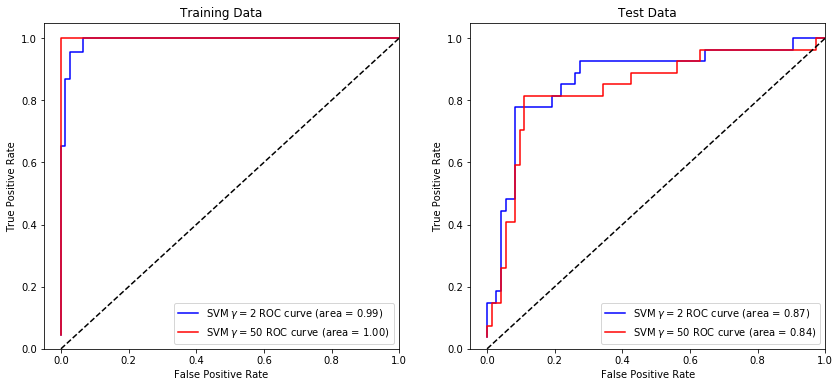

In [87]:
y_train_score3 = svm3.decision_function(X_train) # Distance of the samples X_train to the separating hyperplane.
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
plt.show()

As expected, the more flexible model scores better on training data but worse on the test data.

### 9.6.4 SVM with Multiple Classes
Adding a third class of observations

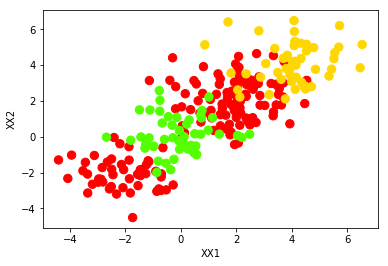

In [88]:
# Adding a third class of observations
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)]) # add additional data to existing X; X becomes (250,2) from (200,2)
yy = np.hstack([y, np.repeat(0,50)])       # add additional data to existing y; y becomes (250,) from (200,)
XX[yy ==0] = XX[yy == 0] +4  # move class 0 data to right and up by adding 4 from the original value

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2')
plt.show()  # -1: red; +1: green; 0: yellow

In [89]:
XX.shape

(250, 2)

In [90]:
yy  

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [91]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

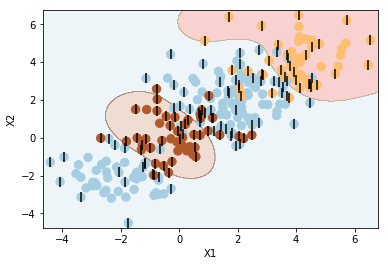

Number of support vectors:  133


In [92]:
plot_svc(svm5, XX, yy)

### 9.6.5 Application to Gene Expression Data

In R, exported the dataset from package 'ISLR' to csv files. 
We now examine the Khan data set, which consists of a number of tissue
samples corresponding to four distinct types of small round blue cell tumors.
For each tissue sample, gene expression measurements are available.
The data set consists of training data, xtrain and ytrain, and testing data,
xtest and ytest.

In [93]:
X_train = pd.read_csv('data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

In [94]:
pd.read_csv('data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1)

,x
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [95]:
pd.read_csv('data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [96]:
pd.read_csv('data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [97]:
# y_train counts
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [98]:
# y_test counts
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [99]:
X_train.shape

(63, 2308)

In [100]:
y_train.shape

(63,)

In [101]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2299,V2300,V2301,V2302,V2303,V2304,V2305,V2306,V2307,V2308
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.146931,-1.739001,-0.248668,-1.078090,-1.385706,0.517289,1.552154,0.095126,0.162019,0.345152,...,-0.436448,-0.443471,-1.365441,-0.653703,-0.477985,-1.857011,-1.741823,-1.067887,-0.507258,-1.566933
std,0.853339,0.905571,0.701464,1.190656,0.653898,0.661113,0.365211,0.488837,0.434185,0.520687,...,0.648043,0.640036,0.706647,0.545154,1.006027,0.930764,0.898833,0.579749,0.577504,0.632065
min,-2.683846,-3.007805,-1.851509,-2.956512,-3.216379,-1.118101,0.776063,-1.218072,-0.639227,-1.572142,...,-2.276917,-2.226550,-2.847312,-2.107018,-2.950759,-4.803621,-5.496768,-3.146555,-2.691193,-3.110021
25%,-0.081323,-2.427080,-0.634168,-2.121514,-1.860178,0.086846,1.288394,-0.321716,-0.123633,0.052318,...,-0.826799,-0.811977,-1.897463,-1.022860,-1.008597,-2.408377,-2.149306,-1.388315,-0.812063,-1.992975
50%,0.244200,-1.949818,-0.113617,-1.274395,-1.211669,0.542266,1.510170,0.137324,0.133569,0.386554,...,-0.290887,-0.408119,-1.387495,-0.658939,-0.306525,-1.641445,-1.709258,-1.115962,-0.428939,-1.500584
75%,0.735390,-1.318729,0.253025,0.235544,-0.882397,0.944085,1.791494,0.437873,0.455650,0.693397,...,-0.000435,-0.026909,-0.813623,-0.356680,0.313942,-1.199981,-1.124832,-0.866431,-0.178323,-1.209827
max,1.285507,0.654770,1.160742,0.583779,-0.264747,2.452728,2.864085,0.956626,1.255815,1.122492,...,0.654146,1.281323,0.210180,0.588231,1.040171,-0.207886,-0.153268,0.445967,0.570471,0.041142


We will use a support vector approach to predict cancer subtype using gene
expression measurements. In this data set, there are a very large number
of features relative to the number of observations. This suggests that we
should use a linear kernel, because the additional flexibility that will result
from using a polynomial or radial kernel is unnecessary.

In [102]:
# This model gives identical results to the svm() of the R package e1071, also based on libsvm library.
svc = SVC(kernel='linear')

# This model is based on liblinear library. 
#svc = LinearSVC()

svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


We see that there are no training errors. In fact, this is not surprising,
because the large number of variables relative to the number of observations
implies that it is easy to find hyperplanes that fully separate the classes.We
are most interested not in the support vector classifier’s performance on the
training observations, but rather its performance on the test observations.

In [104]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5
